In [4]:
#install.packages("caret", dependencies=c("Depends", "Suggests"))


Warning message:
“dependencies ‘R2wd’, ‘rrlda’, ‘webshot2’, ‘RTCGA.rnaseq’, ‘globaltest’, ‘Biobase’, ‘genefilter’, ‘golubEsets’, ‘rPython’, ‘nws’, ‘actuar’, ‘sylly.de’, ‘sylly.es’, ‘marray’, ‘affy’, ‘limma’, ‘Rgraphviz’, ‘graph’, ‘starsdata’, ‘rggobi’, ‘rnaturalearthhires’, ‘Biostrings’, ‘seqLogo’, ‘glmmADMB’, ‘Rcampdf’, ‘tm.lexicon.GeneralInquirer’, ‘cmdstanr’, ‘GAMBoost’, ‘spDataLarge’, ‘M3C’, ‘ComplexHeatmap’, ‘RDCOMClient’, ‘doRedis’, ‘INLA’, ‘sva’ are not available”
also installing the dependencies ‘cond’, ‘nlreg’, ‘cccd’, ‘diffusionMap’, ‘lle’, ‘pcaL1’, ‘tensorflow’, ‘umap’, ‘bigmemory’, ‘synchronicity’, ‘hrbrthemes’, ‘rhub’, ‘biglasso’, ‘KernelKnn’, ‘SIS’, ‘marg’, ‘ddalpha’, ‘dimRed’, ‘NMF’, ‘ROI.plugin.ecos’, ‘ROI.plugin.neos’, ‘ROI.plugin.alabama’, ‘rpf’, ‘snowfall’, ‘umx’, ‘ifaTools’, ‘ltm’, ‘smcfcs’, ‘casebase’, ‘ipw’, ‘SuperLearner’, ‘cobs’, ‘mvPot’, ‘gmm’, ‘revdbayes’, ‘kdecopula’, ‘Rmixmod’, ‘circular’, ‘dismo’, ‘BRugs’, ‘csampling’, ‘bife’, ‘gameofthrones’, ‘harrypotter’

In [5]:
library(caret)
library(e1071)
library(randomForest)
library(ellipse)

In [6]:
install.packages("kernlab")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
library(kernlab)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




# Load the data

In [8]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
dataset$Species = as.factor(dataset$Species)

In [9]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

# Summarize dataset 

In [10]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [11]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [12]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [13]:
# list the levels for the class
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [14]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [15]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.864   Mean   :3.065   Mean   :3.776   Mean   :1.199  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.200   Max.   :6.700   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

# Visualize Dataset 

In [16]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

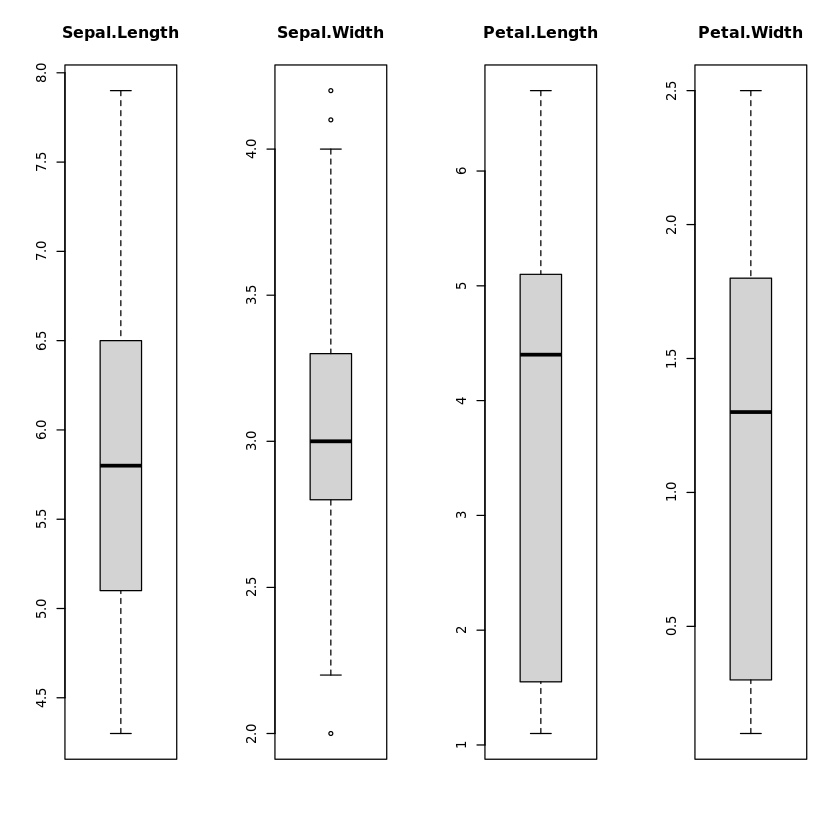

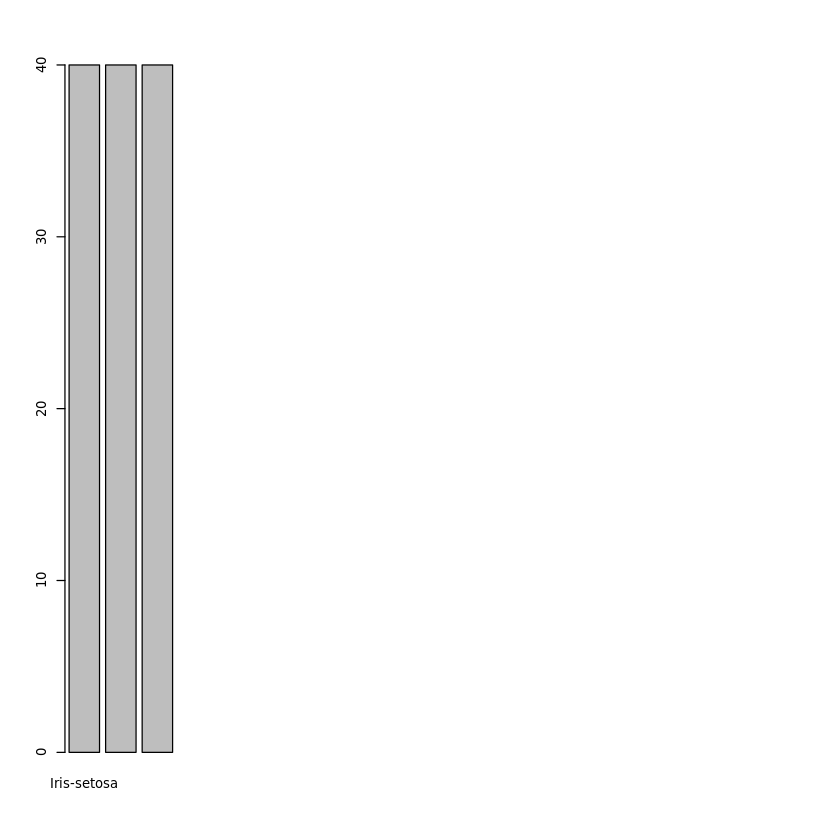

In [17]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}
      
# barplot for class breakdown
plot(y)

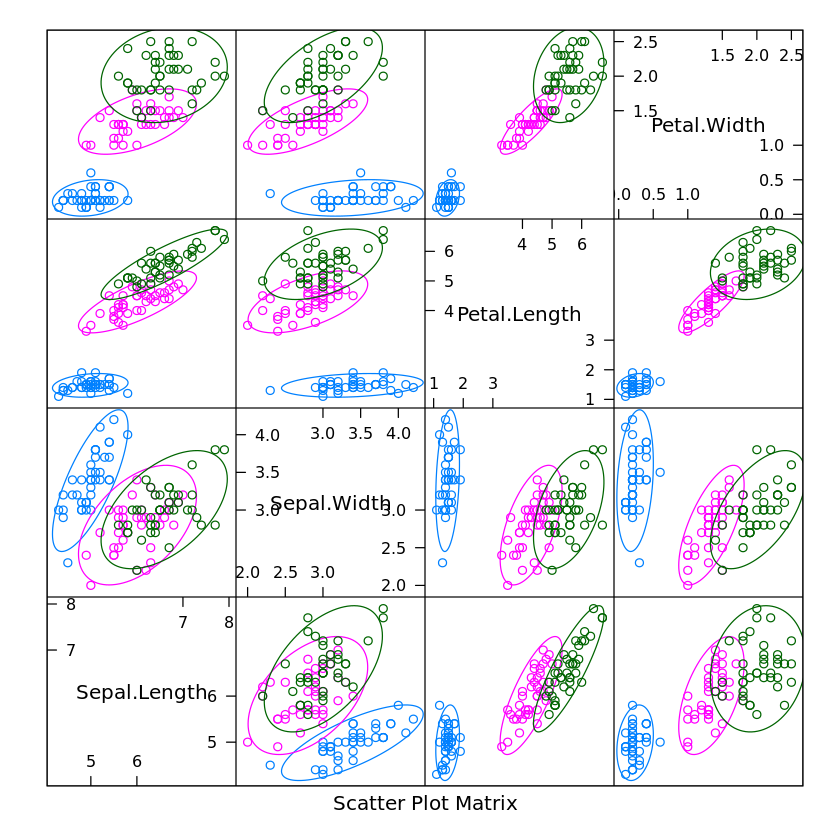

In [18]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")


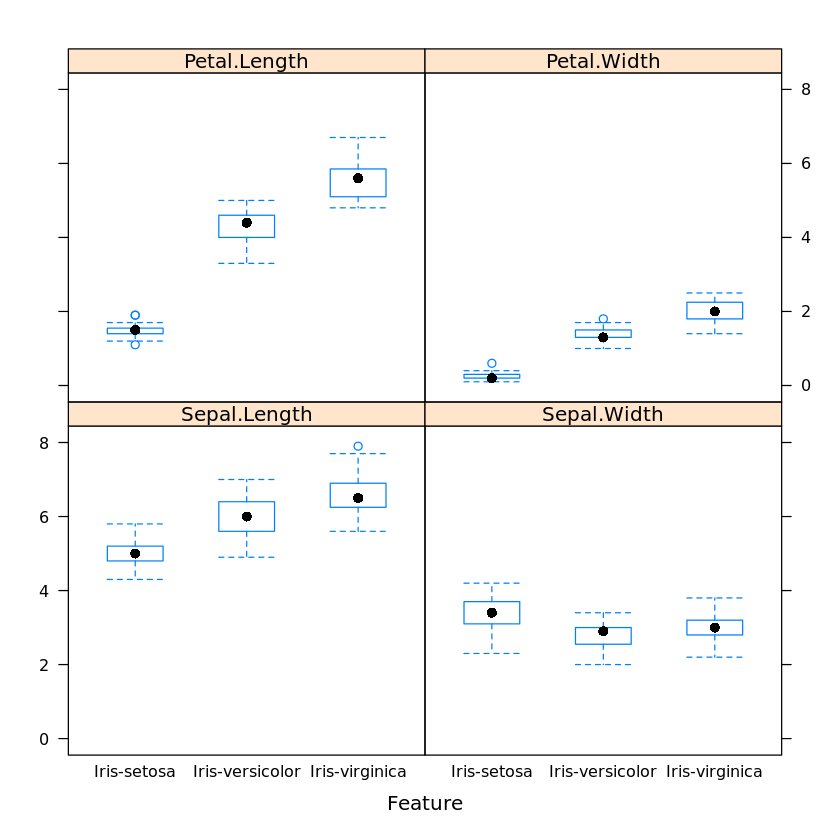

In [19]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

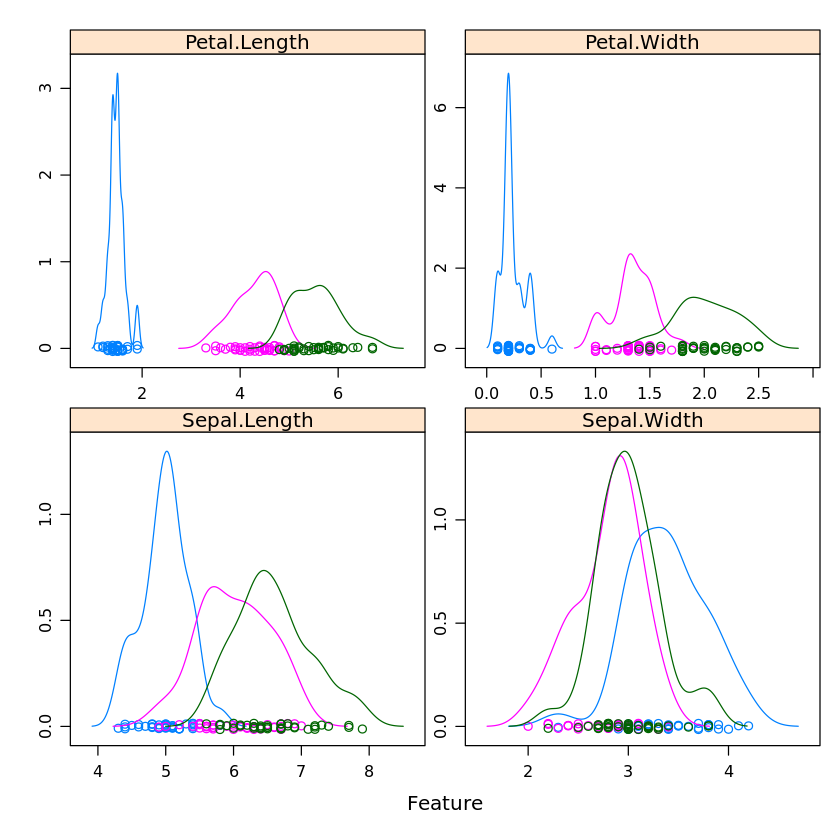

In [20]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [21]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [22]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [23]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9166667 0.9166667    1    0
knn  1.0000000 1.0000000 1.0000000 1.0000000 1.0000000    1    0
svm  0.9166667 0.9166667 1.0000000 0.9666667 1.0000000    1    0
rf   0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000  1.000 0.9750   1.000    1    0
cart 0.750 0.87500  0.875 0.8750   0.875    1    0
knn  1.000 1.00000  1.000 1.0000   1.000    1    0
svm  0.875 0.87500  1.000 0.9500   1.000    1    0
rf   0.875 0.90625  1.000 0.9625   1.000    1    0


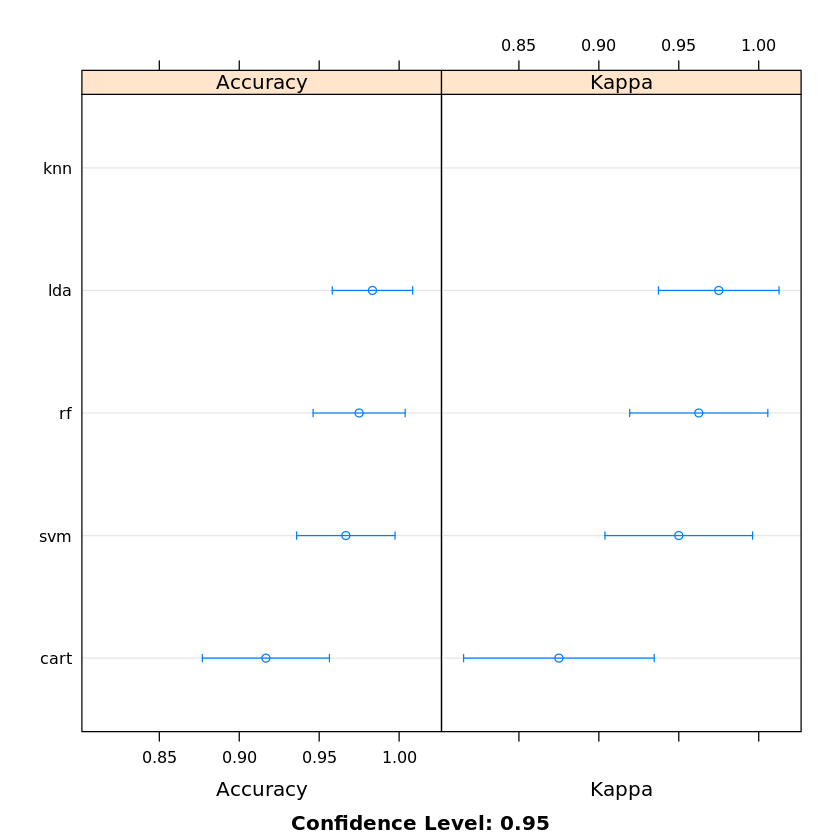

In [24]:
# compare accuracy of models
dotplot(results)

In [25]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [26]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)


Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              0
  Iris-virginica            0               1             10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.9000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value